In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\maith\Downloads\student-mat.csv")
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

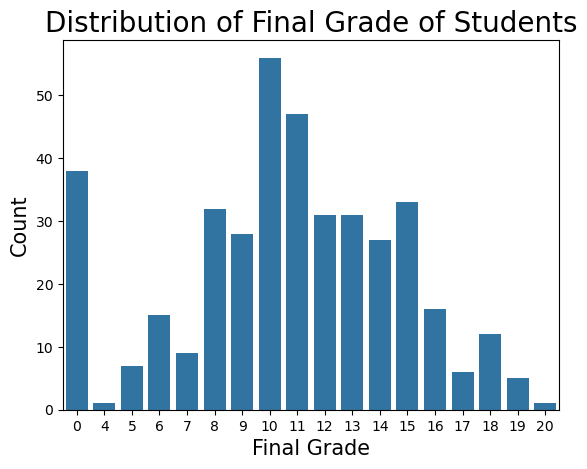

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct way: explicitly pass data and x
b = sns.countplot(x='G3', data=df, order=sorted(df['G3'].unique()))

# Titles and labels
b.set_title('Distribution of Final Grade of Students', fontsize=20)
b.set_xlabel('Final Grade', fontsize=15)
b.set_ylabel('Count', fontsize=15)

plt.show()


In [11]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [12]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
male_students=len(df[df['sex']=='M'])
female_students=len(df[df['sex']=='F'])
print('Number of male students',male_students)
print('Number of female students',female_students)

Number of male students 187
Number of female students 208


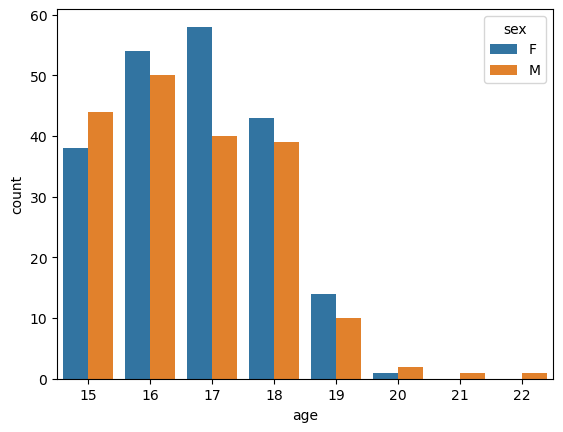

In [21]:
sns.countplot(x='age', hue='sex', data=df)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("count",fontsize=20)
plt.show()

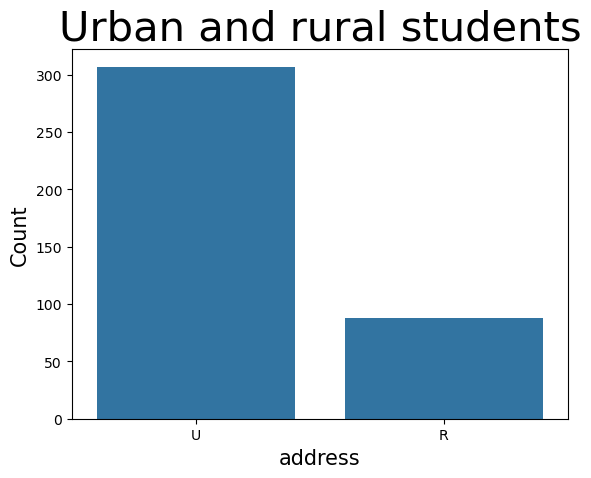

In [28]:
b = sns.countplot(x='address', data=df)
b.set_title('Urban and rural students', fontsize=30)
b.set_xlabel('address', fontsize=15)
b.set_ylabel('Count', fontsize=15)

plt.show()

In [32]:
df['GradeAvg']=(df['G1']+df['G2']+df['G3'])/3

In [36]:
def find_grade(df):
    grades=[]           #create a list to store the data in df

    #for each row in the column,
    for row in df['GradeAvg']:
        #if more than a value
        if row >=(0.9*df['GradeAvg'].max()):
            # append a letter grade
            grades.append('1')
        elif row >=(0.7*df['GradeAvg'].max()):
            # append a letter grade
            grades.append('2')    
        elif row <(0.7*df['GradeAvg'].max()):
            # append a letter grade
            grades.append('3')   
    df['GradeAvg']=grades
    return df         

In [37]:
df_dum=find_grade(df)

In [38]:
df_dum.drop(["school","age"],axis=1,inplace=True)

In [40]:
df_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


In [41]:
#yes/no values
d={'yes':1,'no':0}
df_dum['schoolsup']=df_dum['schoolsup'].map(d)
df_dum['famsup']=df_dum['famsup'].map(d)
df_dum['paid']=df_dum['paid'].map(d)
df_dum['activities']=df_dum['activities'].map(d)
df_dum['nursery']=df_dum['nursery'].map(d)
df_dum['higher']=df_dum['higher'].map(d)
df_dum['internet']=df_dum['internet'].map(d)
df_dum['romantic']=df_dum['romantic'].map(d)

In [43]:
d={'F':1,'M':0}
df_dum['sex']=df_dum['sex'].map(d)

In [44]:
#map the parents job
d={'teacher':0,'health':1,'services':2,'at_home':3,'other':4}
df_dum['Mjob']=df_dum['Mjob'].map(d)
df_dum['Fjob']=df_dum['Fjob'].map(d)


In [ ]:
# map the reason data
d={'home':0,'reputation':1,'course':2,'other':3}
df_dum['reason']=df_dum['reason'].map(d)

In [46]:
# map  the guaedian data
d={'mother':0,'father':1,'other':2}
df_dum['guardian']=df_dum['guardian'].map(d)

In [49]:
df_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [53]:
from sklearn.model_selection import train_test_split
x=df_dum.drop("G3",axis=1)
y=df_dum['G3']
df_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [54]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
L=LinearRegression()

In [64]:
from sklearn.preprocessing import LabelEncoder

# Encode all categorical columns
for col in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])



In [67]:
L.fit(X_train,y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

LinearRegression()

In [68]:
y_pred=L.predict(X_test)

In [69]:
print(L.score(X_test,y_test))

0.7784877387043513
